In [ ]:
import os
import numpy as np
import pandas as pd
from shutil import copyfile

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suyashutekar","key":"1aa711c690a4ec6324602d2096cd9278"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shanks0465/braille-character-dataset

Dataset URL: https://www.kaggle.com/datasets/shanks0465/braille-character-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.30M [00:00<?, ?B/s]
100% 1.30M/1.30M [00:00<00:00, 134MB/s]


In [ ]:
!unzip braille-character-dataset.zip -d braille_dataset

Archive:  braille-character-dataset.zip
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG0dim.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG0rot.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG0whs.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG10dim.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG10rot.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG10whs.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG11dim.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG11rot.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG11whs.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG12dim.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG12rot.jpg  
  inflating: braille_dataset/Braille Dataset/Braille Dataset/a1.JPG12whs.jpg  
  inflating: br

In [ ]:
# !rm -r ./images

In [ ]:
import os
from shutil import copyfile

# Create the 'images' directory
os.mkdir('./images/')

# Create subdirectories for each letter (a to z)
alpha = 'a'
for i in range(26):
    os.mkdir('./images/' + alpha)
    alpha = chr(ord(alpha) + 1)

# Define the root directory of the downloaded dataset
rootdir = '/content/braille_dataset/Braille Dataset/Braille Dataset/'

# Copy files to the corresponding directories
for file in os.listdir(rootdir):
    letter = file[0].lower()
    copyfile(os.path.join(rootdir, file), './images/' + letter + '/' + file)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('./images/',
                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory('./images/',
                                            target_size=(28,28),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [ ]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              validation_data=val_generator,
                              epochs=666,
                              callbacks=[model_ckpt,reduce_lr,early_stop],
                              verbose=1)

Epoch 1/666


<ipython-input-12-709140038fe6>:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


39/39 [==============================] - 5s 80ms/step - loss: 3.2862 - accuracy: 0.0248 - val_loss: 3.2448 - val_accuracy: 0.0449 - lr: 0.0010
Epoch 2/666
 1/39 [..............................] - ETA: 3s - loss: 3.1991 - accuracy: 0.0312

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 3s 83ms/step - loss: 3.1541 - accuracy: 0.0946 - val_loss: 2.8625 - val_accuracy: 0.2083 - lr: 0.0010
Epoch 3/666
39/39 [==============================] - 3s 72ms/step - loss: 2.5553 - accuracy: 0.2500 - val_loss: 2.2396 - val_accuracy: 0.3141 - lr: 0.0010
Epoch 4/666
39/39 [==============================] - 3s 70ms/step - loss: 1.9987 - accuracy: 0.4359 - val_loss: 1.6601 - val_accuracy: 0.5224 - lr: 0.0010
Epoch 5/666
39/39 [==============================] - 3s 70ms/step - loss: 1.5207 - accuracy: 0.5609 - val_loss: 1.3612 - val_accuracy: 0.5962 - lr: 0.0010
Epoch 6/666
39/39 [==============================] - 4s 97ms/step - loss: 1.2515 - accuracy: 0.6346 - val_loss: 1.1228 - val_accuracy: 0.6506 - lr: 0.0010
Epoch 7/666
39/39 [==============================] - 3s 68ms/step - loss: 1.0947 - accuracy: 0.6859 - val_loss: 0.8897 - val_accuracy: 0.7628 - lr: 0.0010
Epoch 8/666
39/39 [==============================] - 3s 75ms/step - loss: 0.8489 -

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 separable_conv2d (Separabl  (None, 26, 26, 64)        283       
 eConv2D)                                                        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 separable_conv2d_1 (Separa  (None, 11, 11, 128)       8896      
 bleConv2D)                                                      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                        

In [ ]:
model = load_model('BrailleNet.h5')
acc = model.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

<ipython-input-14-11a8187ef6d0>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val_generator)[1]


model accuracy: 0.9423


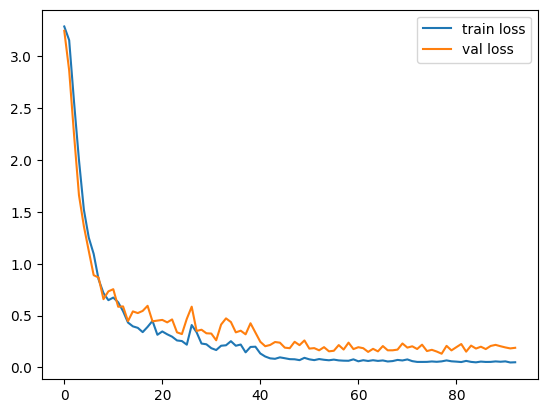

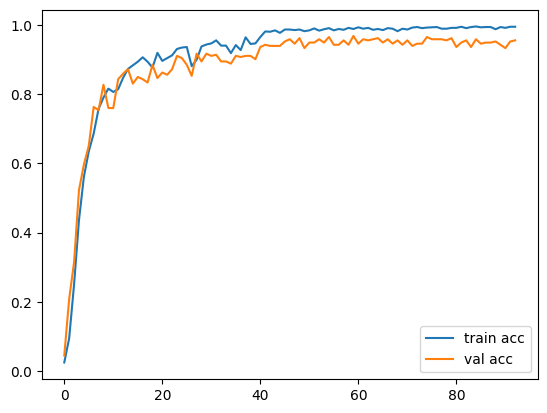

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

pred = model.predict(val_generator)
pred

10/10 [==============================] - 1s 35ms/step


array([[2.8698098e-19, 2.4833366e-13, 1.5774708e-19, ..., 2.1906199e-11,
        2.8787542e-06, 1.3497585e-15],
       [6.6628972e-25, 5.4651023e-21, 4.4263443e-23, ..., 1.4206800e-08,
        9.9703151e-01, 8.9544095e-13],
       [1.2385825e-03, 6.3332542e-12, 1.7366688e-07, ..., 2.4326742e-04,
        6.8681582e-15, 3.0948988e-07],
       ...,
       [1.4233866e-13, 1.0971636e-12, 5.4916705e-12, ..., 1.2936903e-04,
        9.9395972e-01, 5.8379490e-04],
       [6.1348539e-05, 8.3794672e-05, 9.9968731e-01, ..., 5.0909308e-11,
        1.2365262e-17, 1.8310928e-13],
       [6.9350498e-03, 9.8959982e-01, 9.4501284e-04, ..., 4.1223740e-11,
        9.1425666e-16, 2.9264584e-15]], dtype=float32)

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = '/content/braille_dataset/Braille Dataset/Braille Dataset/k1.JPG14whs.jpg'  # Adjust the file name as needed
img = image.load_img(img_path, target_size=(28, 28))  # Resize if necessary

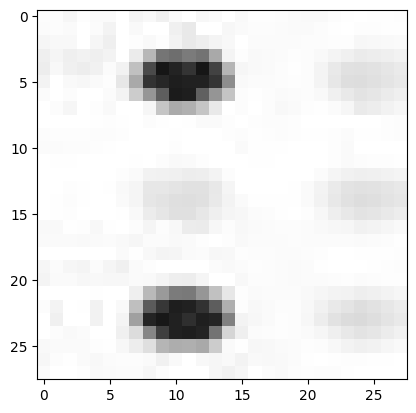

In [ ]:
plt.imshow(img)

In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [246., 246., 246.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [253., 253., 253.]],

       [[251., 251., 251.],
        [252., 252., 252.],
        [250., 250., 250.],
        ...,
        [253., 253., 253.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[246., 246., 246.],
        [248., 248., 248.],
        [248., 248., 248.],
        ...,
        [248., 248., 248.],
        [249., 249., 249.],
        [250., 250., 250.]],

       ...,

       [[249., 249., 249.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [242., 242., 242.],
        [246., 246., 246.],
        [249., 249., 249.]],

       [[247., 247., 247.],
        [252., 252., 252.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.]],

       [[251., 251., 251.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(28, 28, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
model.predict(x)

1/1 [==============================] - 0s 109ms/step


array([[6.5992913e-07, 1.5289980e-12, 8.2920798e-10, 1.2038495e-16,
        8.1666656e-07, 2.4061451e-15, 4.8668640e-19, 7.2613567e-17,
        6.2461500e-06, 1.4103859e-19, 9.9905914e-01, 1.7010108e-18,
        5.5100120e-15, 1.5535370e-10, 4.3194286e-06, 8.9834971e-12,
        1.0358828e-27, 1.3816217e-12, 1.1302143e-05, 2.5206807e-19,
        9.1758976e-04, 3.8292242e-18, 2.2146091e-29, 9.6577100e-11,
        1.2060378e-23, 5.8961308e-12]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)
a

1/1 [==============================] - 0s 21ms/step


array([10])

In [ ]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
predicted_letter = alphabet[a[0]]

print('Predicted letter:', predicted_letter)

Predicted letter: k


In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
    return binary_image

binary_image = preprocess_image('/content/braille_img.png')


In [ ]:
binary_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### For Paragraph

In [ ]:
sentences

### SS

In [ ]:
def segment_sentence_to_words(sentence_image):
    vertical_sum = np.sum(sentence_image, axis=0)
    space_threshold = 5  # Adjust based on your image
    spaces = np.where(vertical_sum < space_threshold)[0]

    words = []
    start = 0
    for i in range(1, len(spaces)):
        if spaces[i] - spaces[i-1] > 1:
            words.append(sentence_image[:, start:spaces[i-1]+1])
            start = spaces[i]
    words.append(sentence_image[:, start:spaces[-1]+1])

    return words

words = segment_sentence_to_words(binary_image)

In [ ]:
words

[array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=uint8),
 array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
      

In [ ]:
def segment_word_to_characters(word_image):
    vertical_sum = np.sum(word_image, axis=0)
    char_threshold = 5  # Adjust based on your image
    chars = np.where(vertical_sum > char_threshold)[0]

    characters = []
    start = 0
    for i in range(1, len(chars)):
        if chars[i] - chars[i-1] > 1:
            characters.append(word_image[:, start:chars[i-1]+1])
            start = chars[i]
    characters.append(word_image[:, start:chars[-1]+1])

    return characters

# Example usage
characters = []
for word in words:
    characters.extend(segment_word_to_characters(word))


IndexError: index -1 is out of bounds for axis 0 with size 0